In [1]:
import pandas as pd
import numpy as np
from datetime import datetime



In [2]:
from scipy.stats import shapiro

In [3]:
res1 = pd.read_csv('res1.csv')

In [4]:
res004 = pd.read_csv('res004.csv')
# res014 = pd.read_csv('res014.csv')

In [5]:
print('ARIMA(0,0,4)')
shapiro(res004.x)

ARIMA(0,0,4)


C:\Users\user\anaconda3\envs\imbd2020\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9225161671638489, pvalue=0.0)

In [2]:
def plotts(ts):
    
    fig = plt.figure(constrained_layout=True, figsize=(12,12))
    grid = gridspec.GridSpec(ncols=6, nrows=6, figure=fig)
    ax1 = fig.add_subplot(grid[:, :])
    ## Set the title. 
    ax1.set_title('All Data')

    sns.lineplot(x="Date", y="Average_price", data=ts, linewidth = 0.8)
    # plt.xticks(rotation=15)

    plt.show()

### 從民國轉西元

In [3]:
raw_series = pd.read_csv('flower_ave_price.csv')

In [4]:
convert_ser_date = raw_series.copy().Date

In [5]:
for itr in range(raw_series.shape[0]):
    date = raw_series.Date[itr].split('/')
    date[0] = str(int(date[0]) + 1911)
    result = '/'.join(date)
    
    convert_ser_date[itr] =  np.datetime64(datetime.strptime(result, "%Y/%m/%d").date())
#     convert_ser_date[itr] =  datetime.strptime(result, "%Y/%m/%d")

In [6]:
convert_ser = raw_series.copy()

In [7]:
convert_ser.Date = convert_ser_date

In [8]:
convert_ser

,Date,Average_price
0,1998-12-01,84.0
1,1998-12-02,113.0
2,1998-12-03,94.0
3,1998-12-04,116.0
4,1998-12-06,96.0
...,...,...
6639,2020-11-26,134.9
6640,2020-11-27,111.8
6641,2020-11-28,166.7
6642,2020-11-30,122.4


In [9]:
convert_ser['Date'] = pd.to_datetime(convert_ser['Date'], errors='coerce')

In [10]:
convert_ser.Date.dt.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020], dtype=int64)

In [11]:
result


'2020/12/01'

In [47]:
datetime.strptime(result, "%Y/%m/%d").date()

datetime.date(2020, 12, 1)

In [61]:
datetime.strptime(result, "%Y/%m/%d").date()

datetime.date(2020, 12, 1)

In [58]:
np.datetime64(datetime.strptime(result, "%Y/%m/%d").date())

numpy.datetime64('2020-12-01')

In [12]:
convert_ser
cal = convert_ser.drop(6643)

In [13]:
convert_ser[(convert_ser.Date.dt.year==2000) & (convert_ser.Date.dt.month==12)].Average_price.describe()

count     26.000000
mean     105.884615
std       16.098017
min       67.000000
25%       94.250000
50%      105.000000
75%      117.000000
max      135.000000
Name: Average_price, dtype: float64

In [14]:
cal[(cal.Date.dt.year==1998) & (cal.Date.dt.month==12)].Average_price.mean()

155.77777777777777

In [15]:
cal

,Date,Average_price
0,1998-12-01,84.0
1,1998-12-02,113.0
2,1998-12-03,94.0
3,1998-12-04,116.0
4,1998-12-06,96.0
...,...,...
6638,2020-11-25,169.4
6639,2020-11-26,134.9
6640,2020-11-27,111.8
6641,2020-11-28,166.7


In [18]:
Date = []
month_ave = []
for year in cal.Date.dt.year.unique():
    if year == 1998:
        m = 12
        mean = cal[(cal.Date.dt.year==year) & (cal.Date.dt.month==12)].Average_price.mean()
        date = np.datetime64(datetime.strptime(str(year)+'/'+str(m), "%Y/%m").date())

        month_ave.append(round(mean, 2))
        Date.append(date)

    elif year != 2020:
        for month in range(1,13):

            mean = cal[(cal.Date.dt.year==year) & (cal.Date.dt.month==month)].Average_price.mean()
            date = np.datetime64(datetime.strptime(str(year)+'/'+str(month), "%Y/%m").date())

            month_ave.append(round(mean, 2))
            Date.append(date)
    else :
        for month in range(1,12):

            mean = cal[(cal.Date.dt.year==2020) & (cal.Date.dt.month==month)].Average_price.mean()
            date = np.datetime64(datetime.strptime(str(year)+'/'+str(month), "%Y/%m").date())

            month_ave.append(round(mean, 2))
            Date.append(date)

In [17]:
Date

[]

In [75]:
month_ave

[155.78,
 174.96,
 156.68,
 157.08,
 134.65,
 94.76,
 149.04,
 159.44,
 169.12,
 161.92,
 170.73,
 162.42,
 192.15,
 200.08,
 152.76,
 178.67,
 128.31,
 67.78,
 156.96,
 105.33,
 113.9,
 199.12,
 209.23,
 144.23,
 105.88,
 119.33,
 177.14,
 161.43,
 116.56,
 102.46,
 124.16,
 118.68,
 178.38,
 199.29,
 169.04,
 154.58,
 120.12,
 158.3,
 103.14,
 100.42,
 60.62,
 131.46,
 151.04,
 116.19,
 135.5,
 148.29,
 159.41,
 104.69,
 94.22,
 113.21,
 97.1,
 98.69,
 88.0,
 76.35,
 93.04,
 124.74,
 163.71,
 169.88,
 225.7,
 175.0,
 179.0,
 103.04,
 162.75,
 106.41,
 107.76,
 102.31,
 114.08,
 94.69,
 135.04,
 184.79,
 206.0,
 173.58,
 115.38,
 95.89,
 125.81,
 168.41,
 109.96,
 105.12,
 166.16,
 144.85,
 126.76,
 131.0,
 173.15,
 107.65,
 156.19,
 145.36,
 112.0,
 90.93,
 94.76,
 91.62,
 138.68,
 140.0,
 194.28,
 212.85,
 167.64,
 102.5,
 94.0,
 105.56,
 110.05,
 136.96,
 129.32,
 161.04,
 138.4,
 118.88,
 171.12,
 158.79,
 183.59,
 157.08,
 158.72,
 89.26,
 127.0,
 79.12,
 67.4,
 73.35,
 93.79,
 1

In [19]:
d = {'Date': Date, 'Average_price': month_ave}
ave_month = pd.DataFrame(data=d)

In [78]:
ave_month.to_csv('ave_month.csv', index = None)

In [18]:
convert_ser.Date[0].astype(object).month

12

In [10]:
no0 = convert_ser.drop(convert_ser[convert_ser.Average_price == 0].index)

In [11]:
no0

,Date,Average_price
0,1998-12-01,84.0
1,1998-12-02,113.0
2,1998-12-03,94.0
3,1998-12-04,116.0
4,1998-12-06,96.0
...,...,...
6639,2020-11-26,134.9
6640,2020-11-27,111.8
6641,2020-11-28,166.7
6642,2020-11-30,122.4


In [125]:
no0.to_csv('no0.csv', index = None)

In [ ]:
convert_ser.drop(convert_ser[convert_ser.score == 0].index)

In [80]:
convert_ser[convert_ser.Average_price == 0]

,Date,Average_price
1698,2004-07-06,0.0
2357,2006-09-04,0.0
5371,2016-08-19,0.0
6175,2019-04-27,0.0
6544,2020-07-30,0.0


In [13]:
convert_ser.to_csv('convert_time.csv', index = None)

In [18]:
convert_ser.Average_price.values

array([ 84. , 113. ,  94. , ..., 166.7, 122.4, 200.5])

In [19]:
convert_ser.Average_price = convert_ser.Average_price.values + 0.1

In [21]:
convert_ser.to_csv('convert_time_0.1.csv', index = None)

In [23]:
from scipy import stats

In [32]:
bc_1 = convert_ser.copy()

In [33]:
plus01 = convert_ser.Average_price.values

In [35]:
bc_1.Average_price,lambda_=stats.boxcox(plus01)
print(lambda_)

0.5248787525231129


In [36]:
bc_2 = convert_ser.copy()

In [40]:
bc_2.Average_price=stats.boxcox(plus01,0.8)


In [42]:
bc_1.to_csv('tran05.csv', index = None)
bc_2.to_csv('tran08.csv', index = None)


### 繪圖全部

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Users\user\anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\msj.ttf',size=14)
sns.set(font=myfont.get_family())
sns.set_style({"font.sans-serif":['Microsoft JhengHei']})
style.use('fivethirtyeight')
#

In [98]:
type(no0.Date[0])

datetime.date

In [111]:
no0

,Date,Average_price
0,1998-12-01 00:00:00,84.0
1,1998-12-02 00:00:00,113.0
2,1998-12-03 00:00:00,94.0
3,1998-12-04 00:00:00,116.0
4,1998-12-06 00:00:00,96.0
...,...,...
6639,2020-11-26 00:00:00,134.9
6640,2020-11-27 00:00:00,111.8
6641,2020-11-28 00:00:00,166.7
6642,2020-11-30 00:00:00,122.4


In [116]:

np.datetime64(no0.Date[0].date())

numpy.datetime64('1998-12-01')

In [131]:
no0['Date'] = pd.to_datetime(no0['Date'])

0      1998-12-01
1      1998-12-02
2      1998-12-03
3      1998-12-04
4      1998-12-06
          ...    
6639   2020-11-26
6640   2020-11-27
6641   2020-11-28
6642   2020-11-30
6643   2020-12-01
Name: Date, Length: 6639, dtype: datetime64[ns]

In [138]:
no0.Date.dt.year

0       1998
1       1998
2       1998
3       1998
4       1998
        ... 
6639    2020
6640    2020
6641    2020
6642    2020
6643    2020
Name: Date, Length: 6639, dtype: int64

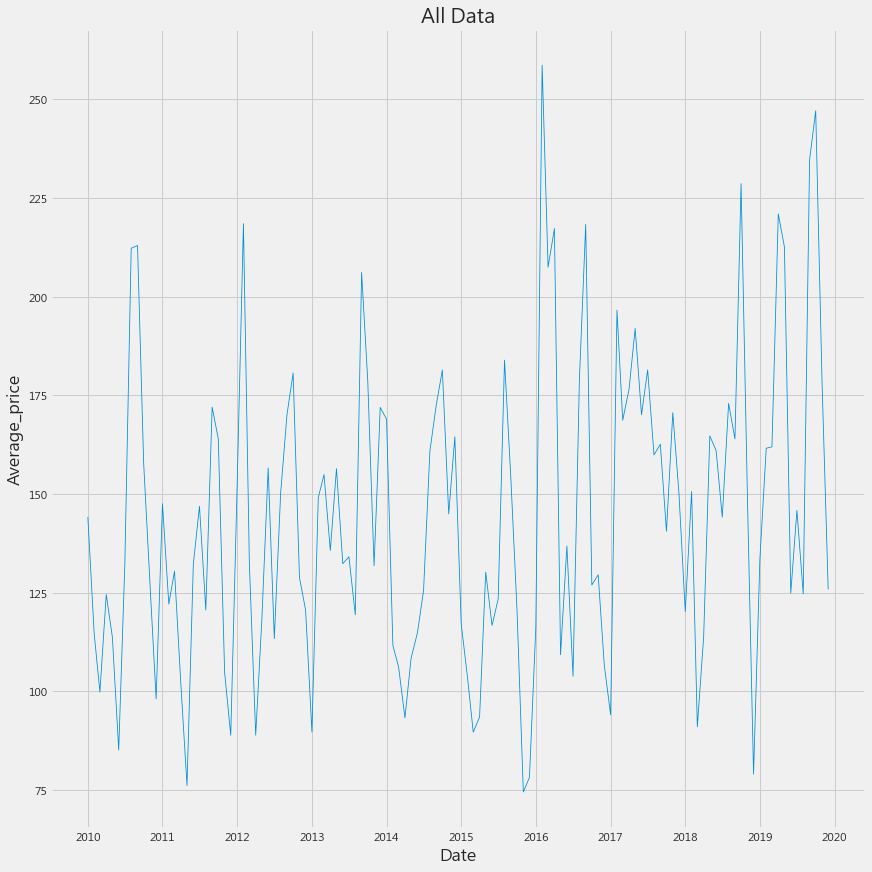

In [24]:
group_year = ave_month .groupby(ave_month .Date.dt.year)
total = pd.DataFrame([])
for year in range(2010,2020,1):
    total = pd.concat([total, group_year.get_group(year)],axis=0)
    
plotts(total)

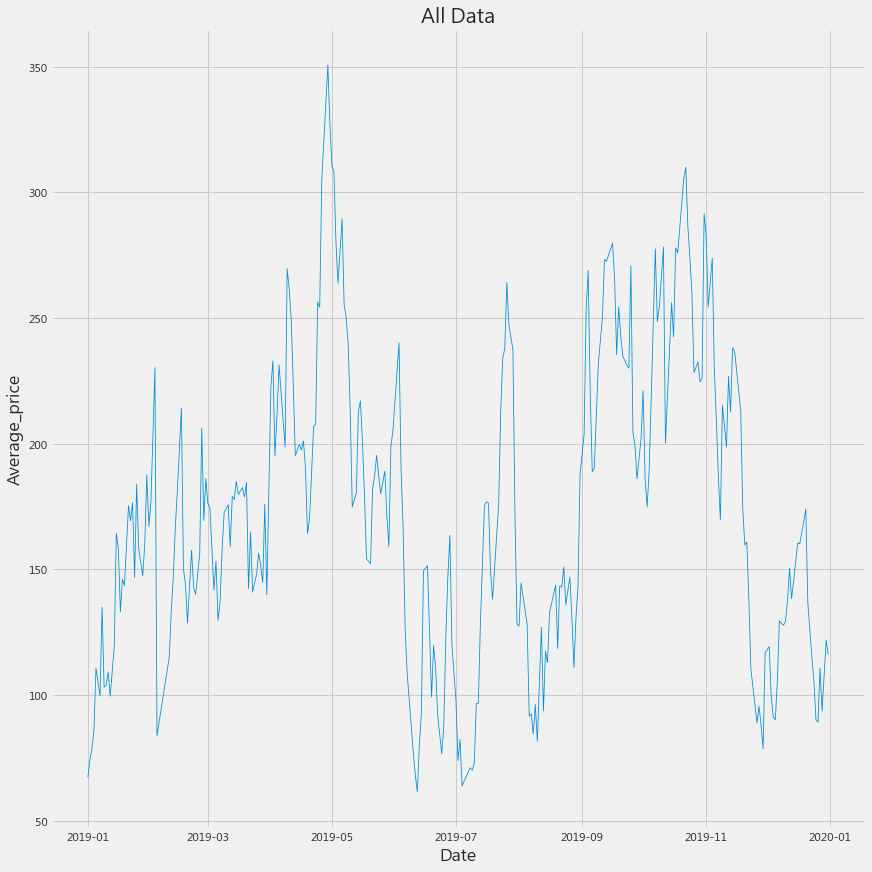

In [167]:
group_year = no0.groupby(no0.Date.dt.year)
total = pd.DataFrame([])
for year in range(2019,2020,1):
    total = pd.concat([total, group_year.get_group(year)],axis=0)
    
plotts(total)

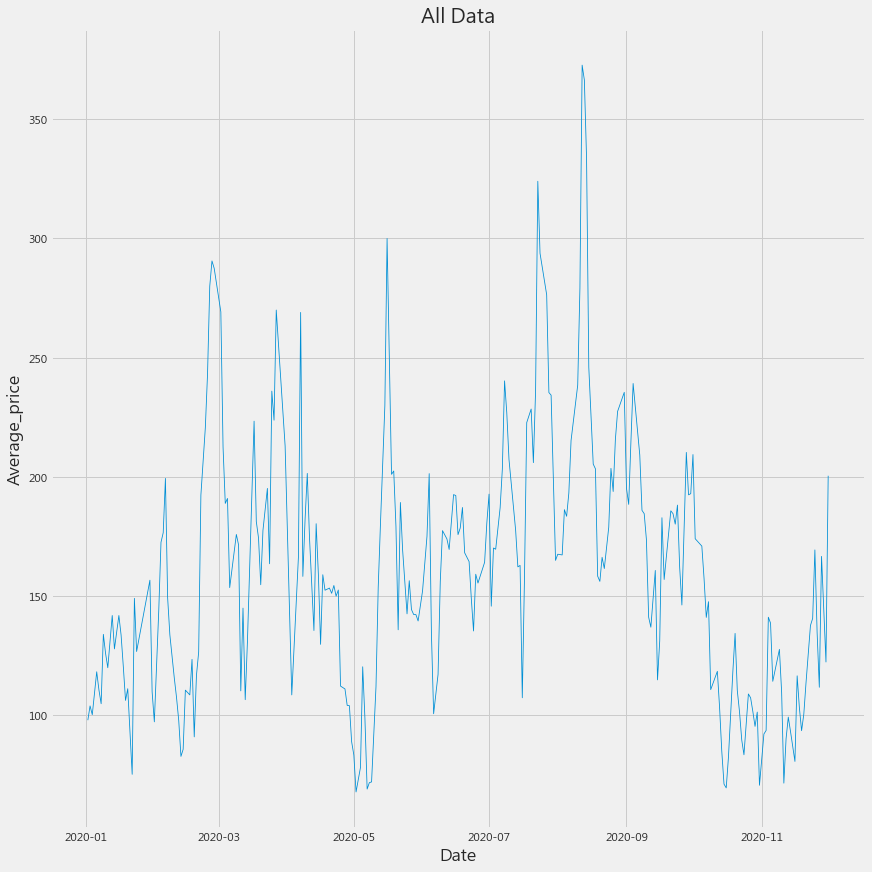

In [166]:
group_year = no0.groupby(no0.Date.dt.year)
total = pd.DataFrame([])
for year in range(2020,2021,1):
    total = pd.concat([total, group_year.get_group(year)],axis=0)
    
plotts(total)

In [150]:
y20 = group.get_group(2020)
y19 = group.get_group(2019)

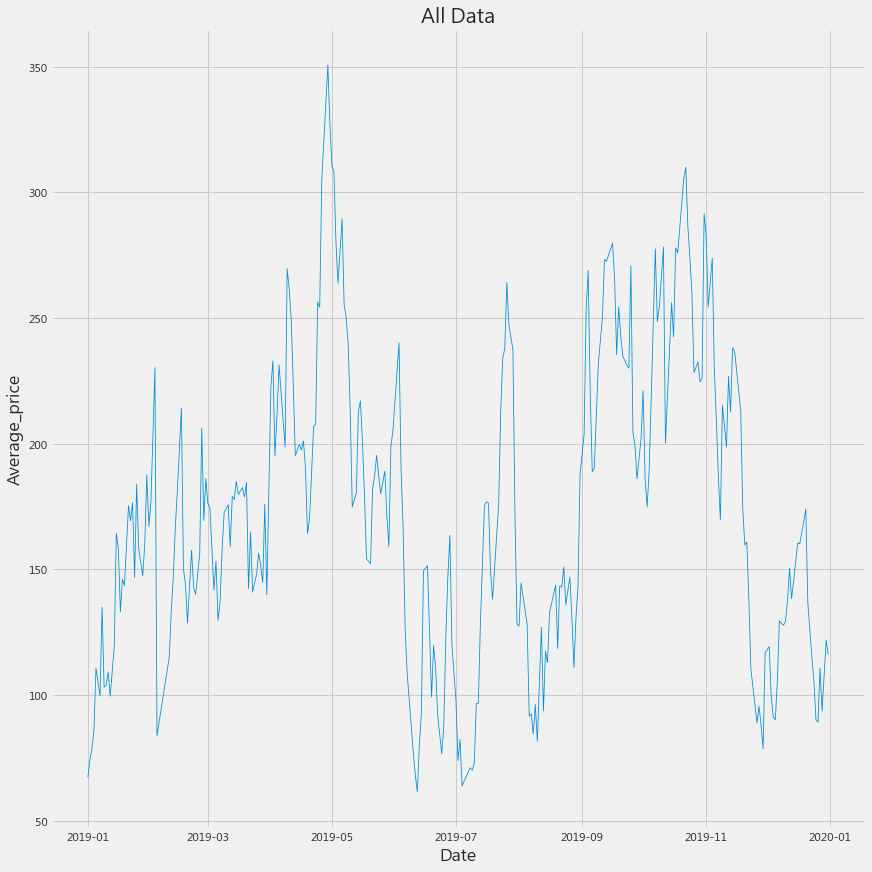

In [151]:
plotts(y19)

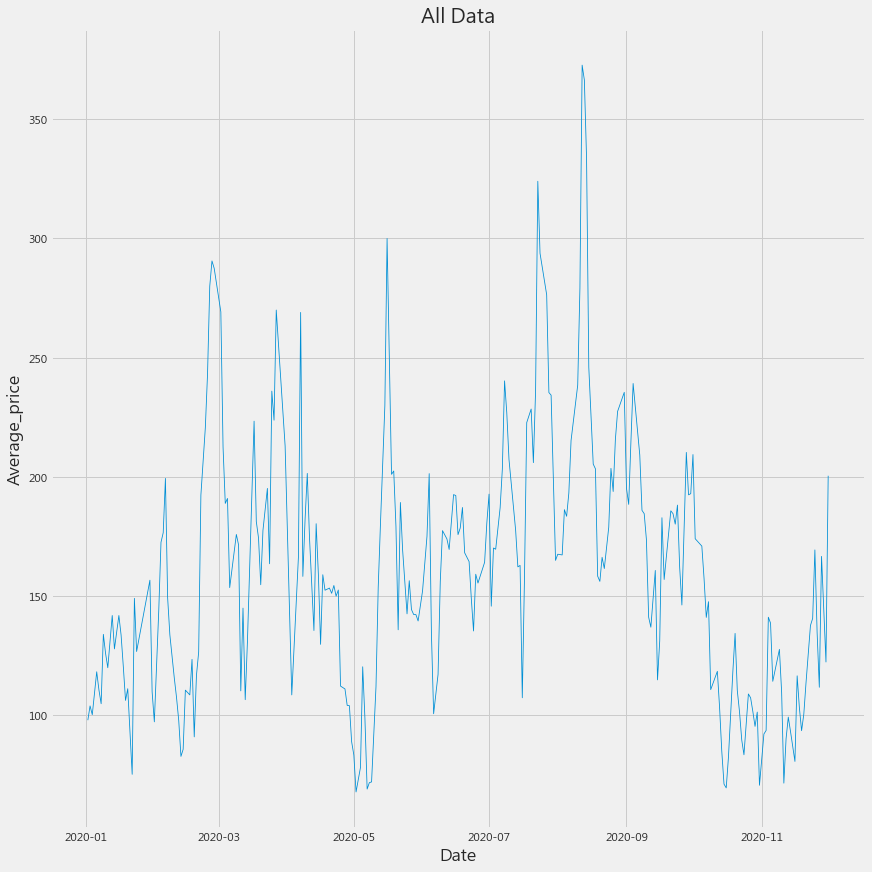

In [149]:
plotts(y20)

'1998-12-01'